In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [37]:
import pandas as pd

df = pd.read_excel('sales_data_sample.xlsx')
df

,ORDERNUMBER,QUANTITYORDERED,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,COUNTRY,DEALSIZE,Discount,Profit
0,10107,30,2,2871.00,2003-02-24,Shipped,USA,Small,0.00,41.9136
1,10121,34,5,2765.90,2003-05-07,Shipped,France,Small,0.00,219.5820
2,10134,41,2,3884.34,2003-07-01,Shipped,France,Medium,0.00,6.8714
3,10145,45,6,3746.70,2003-08-25,Shipped,USA,Medium,0.45,-383.0310
4,10159,49,14,5205.27,2003-10-10,Shipped,USA,Medium,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,15,2244.40,2004-12-02,Shipped,Spain,Small,0.00,315.7404
2819,10373,29,1,3978.51,2005-01-31,Shipped,Finland,Medium,0.20,2.3520
2820,10386,43,4,5417.57,2005-03-01,Resolved,Spain,Medium,0.20,7.4694
2821,10397,34,1,2116.16,2005-03-28,Shipped,France,Small,0.20,22.6782


In [38]:
df['ORDERNUMBER'].value_counts()

10332    18
10106    18
10159    18
10168    18
10398    18
         ..
10242     1
10189     1
10286     1
10216     1
10294     1
Name: ORDERNUMBER, Length: 307, dtype: int64

In [39]:
size_counts = df['DEALSIZE'].value_counts(normalize=True) * 100
size_counts_df = size_counts.reset_index()
size_counts_df.columns = ['DEALSIZE', 'Percentage']
print(size_counts_df)


  DEALSIZE  Percentage
0   Medium   49.025859
1    Small   45.412682
2    Large    5.561459


# 2. Nếu sử dụng Max Absolute Scaler cho SALES thì giá trị có index = 100 được scale thành bao nhiêu

In [40]:
import pandas as pd
from sklearn.preprocessing import MaxAbsScaler

# Giả sử bạn đã có DataFrame df chứa cột SALES
# df = pd.read_csv('your_file.csv')  # Thay thế bằng cách tải dữ liệu của bạn

# Khởi tạo MaxAbsScaler
scaler = MaxAbsScaler()

# Fit và transform dữ liệu
scaled_sales = scaler.fit_transform(df[['SALES']])

# Lấy giá trị đã scale cho index = 100
scaled_value = scaled_sales[100][0]

# In kết quả
print(f'Giá trị SALES đã được scale tại index 100: {scaled_value}')


Giá trị SALES đã được scale tại index 100: 0.21232496378561083


In [41]:
df

,ORDERNUMBER,QUANTITYORDERED,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,COUNTRY,DEALSIZE,Discount,Profit
0,10107,30,2,2871.00,2003-02-24,Shipped,USA,Small,0.00,41.9136
1,10121,34,5,2765.90,2003-05-07,Shipped,France,Small,0.00,219.5820
2,10134,41,2,3884.34,2003-07-01,Shipped,France,Medium,0.00,6.8714
3,10145,45,6,3746.70,2003-08-25,Shipped,USA,Medium,0.45,-383.0310
4,10159,49,14,5205.27,2003-10-10,Shipped,USA,Medium,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,15,2244.40,2004-12-02,Shipped,Spain,Small,0.00,315.7404
2819,10373,29,1,3978.51,2005-01-31,Shipped,Finland,Medium,0.20,2.3520
2820,10386,43,4,5417.57,2005-03-01,Resolved,Spain,Medium,0.20,7.4694
2821,10397,34,1,2116.16,2005-03-28,Shipped,France,Small,0.20,22.6782


13. Hãy cho biết mức độ nhọn của giá trị đặt hàng của các sản phẩm

In [42]:
import pandas as pd
from scipy.stats import kurtosis

# Giả sử bạn đã có DataFrame df chứa cột ORDER_VALUES
# df = pd.read_csv('your_file.csv')  # Thay thế bằng cách tải dữ liệu của bạn

# Tính chỉ số kurtosis
kurtosis_value = kurtosis(df['SALES'])

# Xác định loại phân phối
if kurtosis_value > 3:
    distribution_type = 'Leptokurtic'
elif kurtosis_value == 3:
    distribution_type = 'Mesokurtic'
else:
    distribution_type = 'Platykurtic'

# In kết quả
print(f'Chỉ số kurtosis: {kurtosis_value}, Phân phối: {distribution_type}')


Chỉ số kurtosis: 1.7873782707746377, Phân phối: Platykurtic


20. Hãy cho biết dựa vào biểu đồ boxplot về doanh số trên từng nhóm kích thước đặt hàng thì yếu tố về kích thước đặt hàng có vai trò trong việc dự báo giá trị đặt hàng hay không


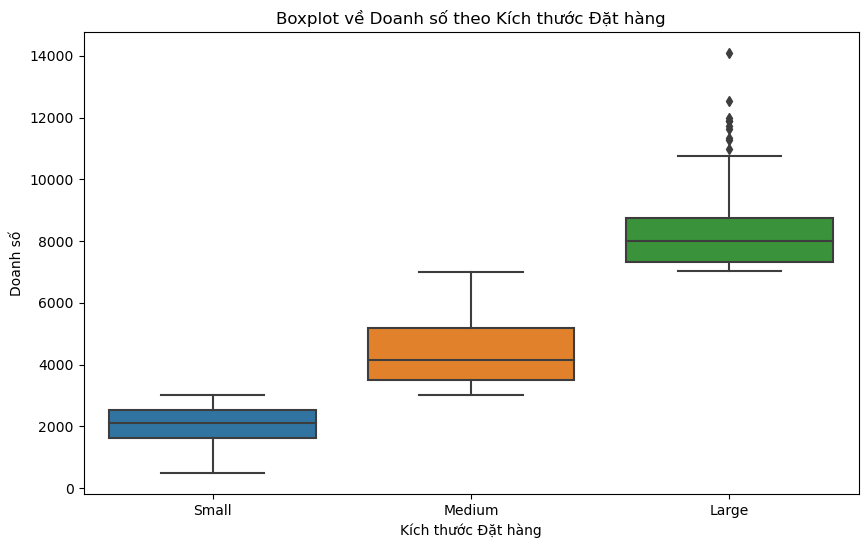

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Giả sử bạn đã có DataFrame df chứa các cột DEALSIZE và SALES
# df = pd.read_csv('your_file.csv')  # Thay thế bằng cách tải dữ liệu của bạn

# Vẽ boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='DEALSIZE', y='SALES', data=df)
plt.title('Boxplot về Doanh số theo Kích thước Đặt hàng')
plt.xlabel('Kích thước Đặt hàng')
plt.ylabel('Doanh số')
plt.show()


3. 

In [44]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MaxAbsScaler

# Giả sử bạn đã có DataFrame df chứa cột SALES
# df = pd.read_csv('your_file.csv')  # Thay thế bằng cách tải dữ liệu của bạn

# Khởi tạo Z-Score Scaler
z_score_scaler = StandardScaler()

# Fit và transform dữ liệu SALES
z_scaled_sales = z_score_scaler.fit_transform(df[['SALES']])

# Khởi tạo MaxAbsScaler
max_abs_scaler = MaxAbsScaler()

# Fit và transform dữ liệu đã chuẩn hóa
max_abs_scaled_sales = max_abs_scaler.fit_transform(z_scaled_sales)

# Lấy giá trị đã scale cho index = 100
scaled_value = max_abs_scaled_sales[100][0]

# In kết quả
print(f'Giá trị SALES đã được scale tại index 100: {scaled_value}')


Giá trị SALES đã được scale tại index 100: -0.053543911213573936


5.


In [45]:
import pandas as pd
from scipy.stats import chi2_contingency

# Giả sử bạn đã có DataFrame df chứa cột ORDER_STATUS và DEALSIZE
# df = pd.read_csv('your_file.csv')  # Thay thế bằng cách tải dữ liệu của bạn

# Tạo bảng tần suất
contingency_table = pd.crosstab(df['STATUS'], df['DEALSIZE'])

# Kiểm định chi-squared
chi2, p, dof, expected = chi2_contingency(contingency_table)

# In kết quả p-value
print(f'p-value: {p}')

if p < 0.05:
    print("Có mối liên hệ giữa trạng thái giao hàng và kích thước đặt hàng.")
else:
    print("Không có mối liên hệ giữa trạng thái giao hàng và kích thước đặt hàng.")


p-value: 0.0001614574648411617
Có mối liên hệ giữa trạng thái giao hàng và kích thước đặt hàng.


In [46]:
7.

7.0

In [47]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Giả sử bạn đã có DataFrame df chứa cột SALES
# df = pd.read_csv('your_file.csv')  # Thay thế bằng cách tải dữ liệu của bạn

# Khởi tạo Z-Score Scaler
scaler = StandardScaler()

# Fit và transform dữ liệu SALES
scaler.fit(df[['SALES']])

# Tính Z-Score cho giá trị 10000
value_to_scale = 10000
mean = scaler.mean_[0]
std = scaler.scale_[0]
z_score = (value_to_scale - mean) / std

# In kết quả
print(f'Giá trị 10000 sau khi được scale: {z_score}')


Giá trị 10000 sau khi được scale: 3.500393663082633


6. 

In [48]:
import pandas as pd

# Giả sử bạn đã có DataFrame df chứa cột COUNTRY và SALES
# df = pd.read_csv('your_file.csv')  # Thay thế bằng cách tải dữ liệu của bạn

# Tính tổng doanh số theo quốc gia
total_sales_by_country = df.groupby('COUNTRY')['SALES'].sum().reset_index()

# Sắp xếp theo doanh số giảm dần
sorted_sales = total_sales_by_country.sort_values(by='SALES', ascending=False)

# Lấy quốc gia ở vị trí thứ 5
fifth_country = sorted_sales.iloc[4]  # index 4 là vị trí thứ 5

# In kết quả
print(f'Tổng doanh số đặt hàng ở quốc gia thứ 5: {fifth_country["COUNTRY"]}, Doanh số: {fifth_country["SALES"]}')


Tổng doanh số đặt hàng ở quốc gia thứ 5: UK, Doanh số: 478880.46


In [49]:
12

12

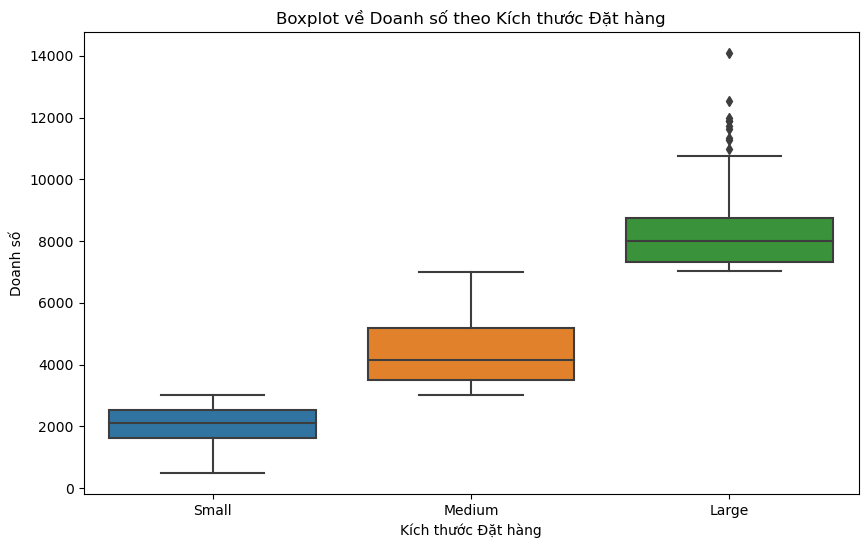

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Giả sử bạn đã có DataFrame df chứa các cột DEALSIZE và SALES
# df = pd.read_csv('your_file.csv')  # Thay thế bằng cách tải dữ liệu của bạn

# Vẽ boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='DEALSIZE', y='SALES', data=df)
plt.title('Boxplot về Doanh số theo Kích thước Đặt hàng')
plt.xlabel('Kích thước Đặt hàng')
plt.ylabel('Doanh số')
plt.show()


In [52]:
df

,ORDERNUMBER,QUANTITYORDERED,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,COUNTRY,DEALSIZE,Discount,Profit
0,10107,30,2,2871.00,2003-02-24,Shipped,USA,Small,0.00,41.9136
1,10121,34,5,2765.90,2003-05-07,Shipped,France,Small,0.00,219.5820
2,10134,41,2,3884.34,2003-07-01,Shipped,France,Medium,0.00,6.8714
3,10145,45,6,3746.70,2003-08-25,Shipped,USA,Medium,0.45,-383.0310
4,10159,49,14,5205.27,2003-10-10,Shipped,USA,Medium,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,15,2244.40,2004-12-02,Shipped,Spain,Small,0.00,315.7404
2819,10373,29,1,3978.51,2005-01-31,Shipped,Finland,Medium,0.20,2.3520
2820,10386,43,4,5417.57,2005-03-01,Resolved,Spain,Medium,0.20,7.4694
2821,10397,34,1,2116.16,2005-03-28,Shipped,France,Small,0.20,22.6782


In [51]:
import pandas as pd

# Giả sử bạn đã có DataFrame df chứa cột DEALSIZE
# df = pd.read_csv('your_file.csv')  # Thay thế bằng cách tải dữ liệu của bạn

# Tính tổng số sản phẩm theo kích thước
size_counts = df['DEALSIZE'].value_counts(normalize=True) * 100

# Chuyển đổi thành DataFrame
size_counts_df = size_counts.reset_index()
size_counts_df.columns = ['DEALSIZE', 'Percentage']

# In kết quả
print(size_counts_df)


  DEALSIZE  Percentage
0   Medium   49.025859
1    Small   45.412682
2    Large    5.561459


10 

In [53]:
df

,ORDERNUMBER,QUANTITYORDERED,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,COUNTRY,DEALSIZE,Discount,Profit
0,10107,30,2,2871.00,2003-02-24,Shipped,USA,Small,0.00,41.9136
1,10121,34,5,2765.90,2003-05-07,Shipped,France,Small,0.00,219.5820
2,10134,41,2,3884.34,2003-07-01,Shipped,France,Medium,0.00,6.8714
3,10145,45,6,3746.70,2003-08-25,Shipped,USA,Medium,0.45,-383.0310
4,10159,49,14,5205.27,2003-10-10,Shipped,USA,Medium,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,15,2244.40,2004-12-02,Shipped,Spain,Small,0.00,315.7404
2819,10373,29,1,3978.51,2005-01-31,Shipped,Finland,Medium,0.20,2.3520
2820,10386,43,4,5417.57,2005-03-01,Resolved,Spain,Medium,0.20,7.4694
2821,10397,34,1,2116.16,2005-03-28,Shipped,France,Small,0.20,22.6782


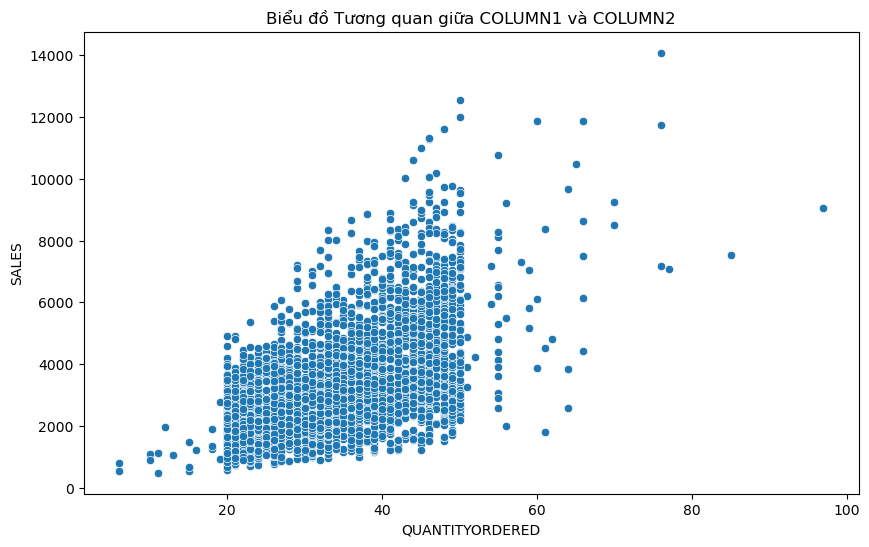

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Giả sử bạn đã có DataFrame df chứa hai cột cần phân tích
# df = pd.read_csv('your_file.csv')  # Thay thế bằng cách tải dữ liệu của bạn

# Chọn hai cột, ví dụ: 'COLUMN1' và 'COLUMN2'
column_x = 'QUANTITYORDERED'  # Thay thế bằng tên cột của bạn
column_y = 'SALES'  # Thay thế bằng tên cột của bạn

# Vẽ scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df[column_x], y=df[column_y])
plt.title('Biểu đồ Tương quan giữa COLUMN1 và COLUMN2')
plt.xlabel(column_x)
plt.ylabel(column_y)
plt.show()
